In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt 
import numpy as np
import joblib

In [31]:
# Load reduced dataset
train_data = pd.read_csv('../data/reduced_dataset/reduced_train_data.csv')
test_data = pd.read_csv('../data/reduced_dataset/reduced_test_data.csv')

# Split to X_train, X_test, y_train, y_test
X_train = train_data[train_data.columns[:-1]]
X_test = test_data[test_data.columns[:-1]]

y_train = train_data['goal']
y_test = test_data['goal']

In [32]:
# Prepare the train and test data
X_train_scaled = X_train.to_numpy()
X_test_scaled = X_test.to_numpy()

## Models

### Logistic Regression

In [33]:
# Train the model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Make prediction
y_pred_lr = lr_model.predict(X_test_scaled)

### Decision Tree

In [34]:
# Train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Make prediction
y_pred_dt = dt_model.predict(X_test_scaled)

### Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

### Support Vector Machine (SVM)

In [36]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

## Models Evaluation

### Accuracy, Precision, Recall, F1-score

In [37]:
def binary_classification_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    confusion_matrix = np.array([[TN, FP],
                   [FN, TP]])
    
    return [confusion_matrix, accuracy, precision, recall, f1_score]


In [38]:
print("Logistic Regression:")
confusion_matrix, accuracy, precision, recall, f1_score = binary_classification_metrics(y_test.to_numpy().flatten(), y_pred_lr.flatten())
print(f"    Confusion matrix: {confusion_matrix}")
print(f"    Accuracy: {accuracy:.2f}")
print(f"    Precision: {precision:.2f}")
print(f"    Recall: {recall:.2f}")
print(f"    F1 score: {f1_score:.2f}")

Logistic Regression:
    Confusion matrix: [[32  4]
 [ 3 21]]
    Accuracy: 0.88
    Precision: 0.84
    Recall: 0.88
    F1 score: 0.86


In [39]:
print("Decision Tree:")
confusion_matrix, accuracy, precision, recall, f1_score = binary_classification_metrics(y_test.to_numpy().flatten(), y_pred_dt.flatten())
print(f"    Confusion matrix: {confusion_matrix}")
print(f"    Accuracy: {accuracy:.2f}")
print(f"    Precision: {precision:.2f}")
print(f"    Recall: {recall:.2f}")
print(f"    F1 score: {f1_score:.2f}")

Decision Tree:
    Confusion matrix: [[30  6]
 [ 3 21]]
    Accuracy: 0.85
    Precision: 0.78
    Recall: 0.88
    F1 score: 0.82


In [40]:
print("Random Forest:")
confusion_matrix, accuracy, precision, recall, f1_score = binary_classification_metrics(y_test.to_numpy().flatten(), y_pred_rf.flatten())
print(f"    Confusion matrix: {confusion_matrix}")
print(f"    Accuracy: {accuracy:.2f}")
print(f"    Precision: {precision:.2f}")
print(f"    Recall: {recall:.2f}")
print(f"    F1 score: {f1_score:.2f}")

Random Forest:
    Confusion matrix: [[30  6]
 [ 4 20]]
    Accuracy: 0.83
    Precision: 0.77
    Recall: 0.83
    F1 score: 0.80


In [41]:
print("Support Vector Machine (SVM):")
confusion_matrix, accuracy, precision, recall, f1_score = binary_classification_metrics(y_test.to_numpy().flatten(), y_pred_svm.flatten())
print(f"    Confusion matrix: {confusion_matrix}")
print(f"    Accuracy: {accuracy:.2f}")
print(f"    Precision: {precision:.2f}")
print(f"    Recall: {recall:.2f}")
print(f"    F1 score: {f1_score:.2f}")

Support Vector Machine (SVM):
    Confusion matrix: [[33  3]
 [ 3 21]]
    Accuracy: 0.90
    Precision: 0.88
    Recall: 0.88
    F1 score: 0.88


## ROC Curve & AUC Score

In [42]:
def plot_roc(title, y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    tpr_list = []
    fpr_list = []

    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        TN = np.sum((y_true == 0) & (y_pred == 0))

        TPR = TP / (TP + FN) if (TP + FN) else 0
        FPR = FP / (FP + TN) if (FP + TN) else 0

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr_list, tpr_list, label="ROC Curve", color='blue')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

Logistic Regression


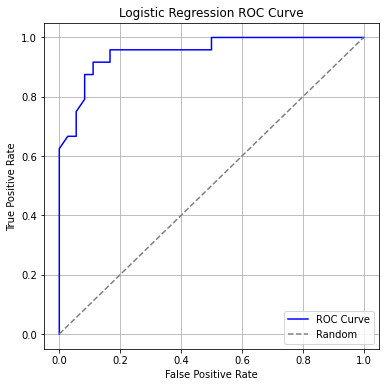

AUC Score: 0.9537


In [43]:
print("Logistic Regression")
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
plot_roc('Logistic Regression', y_test, y_probs)
# Compute AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

Decision Tree


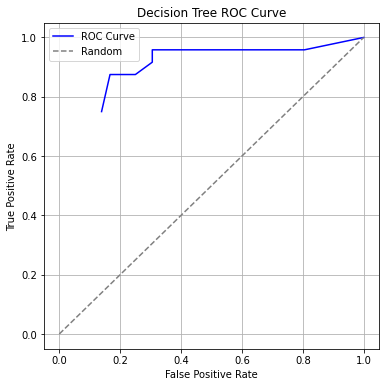

AUC Score: 0.87


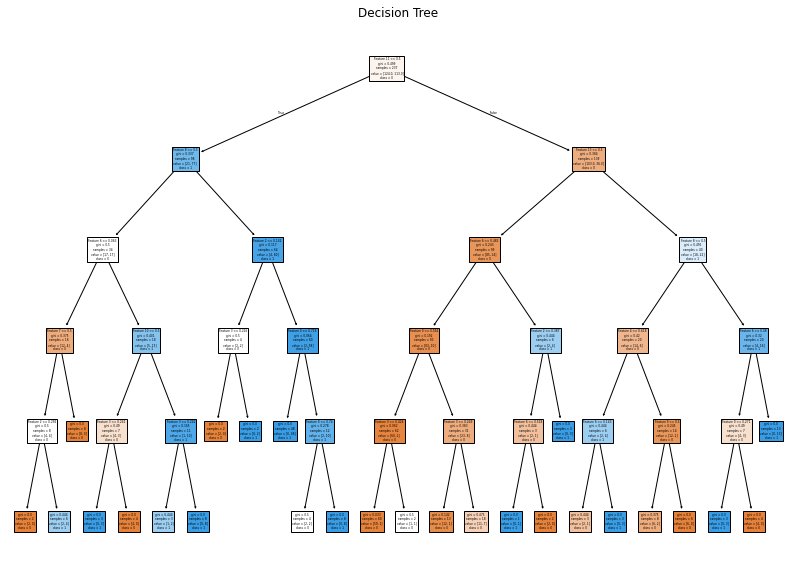

In [44]:
print("Decision Tree")
y_probs = dt_model.predict_proba(X_test_scaled)[:, 1]
plot_roc('Decision Tree', y_test, y_probs)
# Compute AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")


# Plot tree
plt.figure(figsize=(14, 10))
plot_tree(dt_model, filled=True, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])], class_names=['0', '1'])
plt.title("Decision Tree")
plt.show()

Random Forest


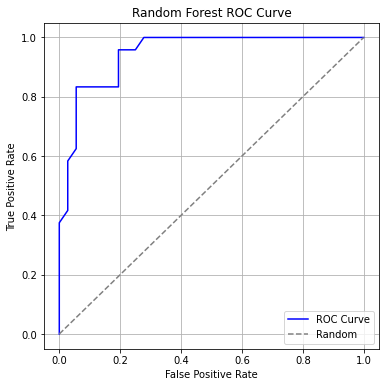

AUC Score: 0.95


In [45]:
print("Random Forest")
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
plot_roc('Random Forest', y_test, y_probs)
# Compute AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")


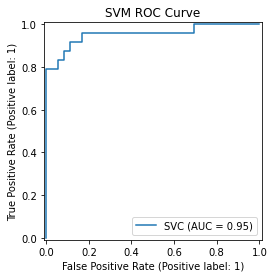

In [46]:
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title('SVM ROC Curve')
plt.show()

## Save models

In [47]:
joblib.dump(lr_model, '../models/supervised/logistic_regression_model.pkl')
joblib.dump(rf_model, '../models/supervised/random_forest_model.pkl')
joblib.dump(dt_model, '../models/supervised/decision_tree_model.pkl')
joblib.dump(svm_model, '../models/supervised/svm_model.pkl')

['../models/supervised/svm_model.pkl']

In [48]:
joblib.dump(dt_model, '../models/best_models/best_decision_tree_model.pkl')
joblib.dump(svm_model, '../models/best_models/best_svm_model.pkl')

['../models/best_models/best_svm_model.pkl']